## Travel Insurance Prediction Data Analysis

### Import the necessary libraries

In [1]:
# necessary libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import pickle
warnings.filterwarnings('ignore')
from pathlib import Path
from pandas_profiling import ProfileReport

### Load and analysis the data

In [21]:
df = pd.read_csv(r"C:\Users\Dimitris-PC\Documents\Github Projects\Github-Project-3-Machine-Learning\Cleaning\cleaning_dataset.csv")

In [3]:
#df = df.drop('Unnamed: 0', axis=1)

In [22]:
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,0,1,1500000,4,0,1,1,1
1983,28,0,1,1750000,5,1,0,1,0
1984,28,0,1,1150000,6,1,0,0,0
1985,34,0,1,1000000,6,0,1,1,1


In [5]:
# prof = ProfileReport(df)
# prof

In [6]:
# #Count the number of duplicate rows
# num_duplicates = df.duplicated().sum()
# num_duplicates

In [7]:
# #Remove duplicates
# df.drop_duplicates(keep='first', inplace=True)

In [8]:
# #Display the updated DataFrame
# print(df)

In [9]:
# #Verify the number of removed duplicates
# num_removed = num_duplicates - df.duplicated().sum()
# print(f"Removed {num_removed} duplicate rows.")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1987 non-null   int64
 1   Employment Type      1987 non-null   int64
 2   GraduateOrNot        1987 non-null   int64
 3   AnnualIncome         1987 non-null   int64
 4   FamilyMembers        1987 non-null   int64
 5   ChronicDiseases      1987 non-null   int64
 6   FrequentFlyer        1987 non-null   int64
 7   EverTravelledAbroad  1987 non-null   int64
 8   TravelInsurance      1987 non-null   int64
dtypes: int64(9)
memory usage: 139.8 KB


In [11]:
# prof = ProfileReport(df)
# prof

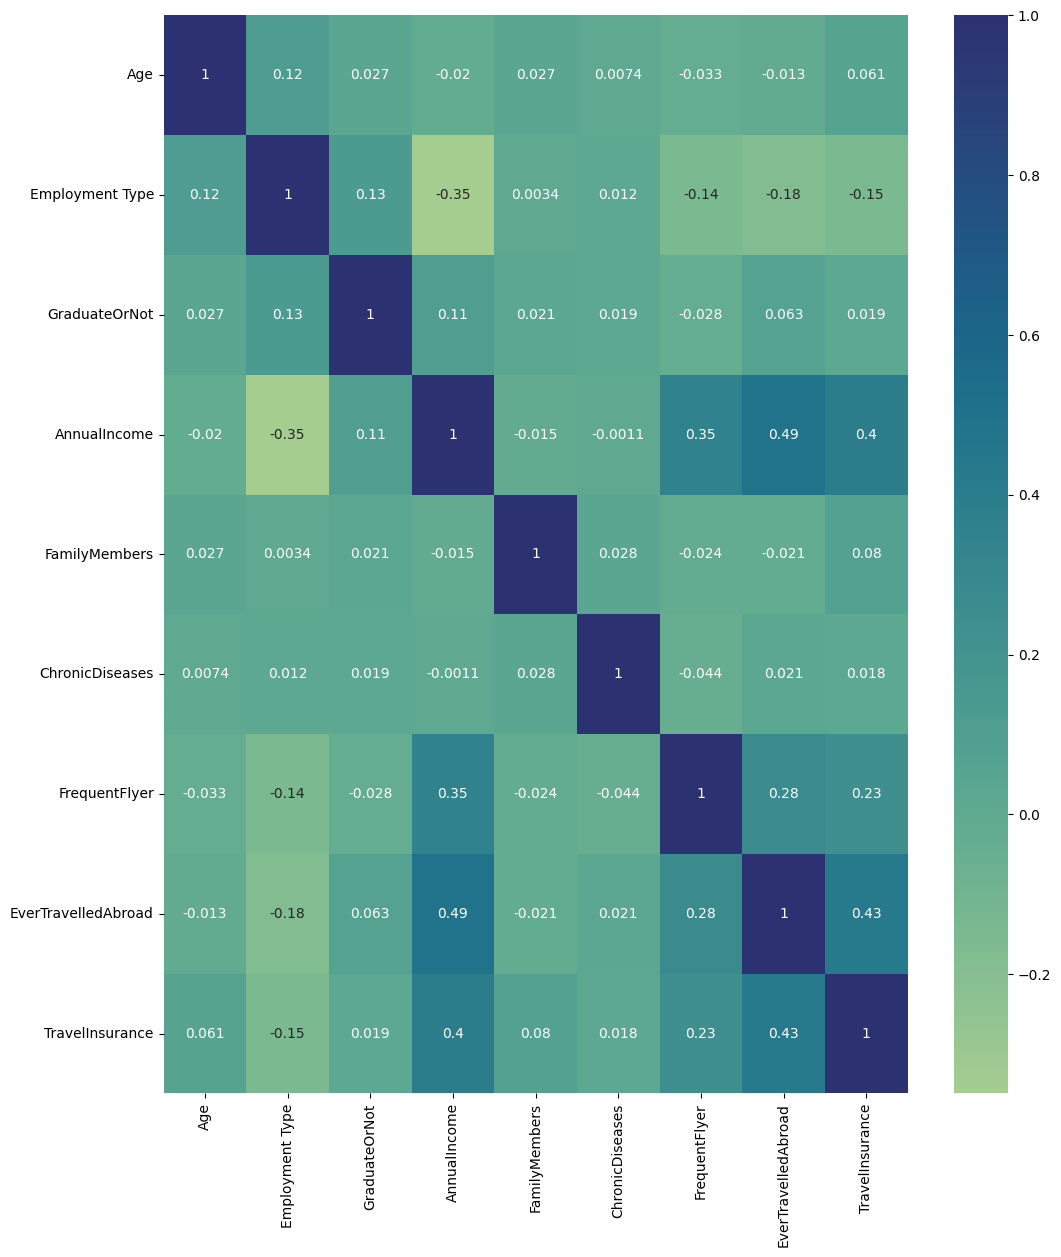

In [24]:
# Correlations
fig, ax = plt.subplots(figsize=(12, 14))
sns.heatmap(df.corr(), annot  = True, cmap='crest', ax=ax)

#Save the figure with adjusted parameters
plt.savefig('plot.jpg', format='jpeg', dpi=300)

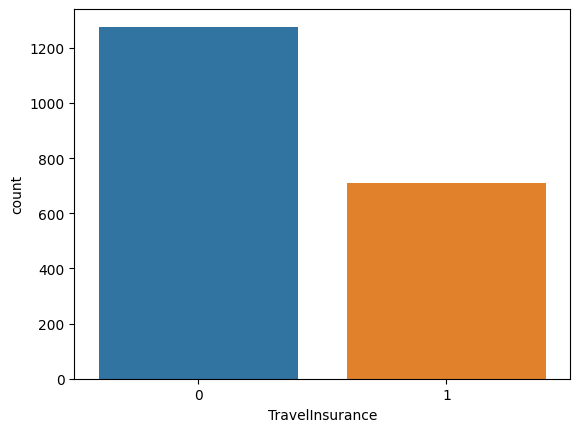

In [25]:
sns.countplot(x = df['TravelInsurance'])
None

In [26]:
df['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [27]:
df.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.286865,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,0.452412,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,0.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


The mean income is  932762.96
The median income is  900000.0


Text(0.5, 1.0, 'Distribution curve for Annual Income')

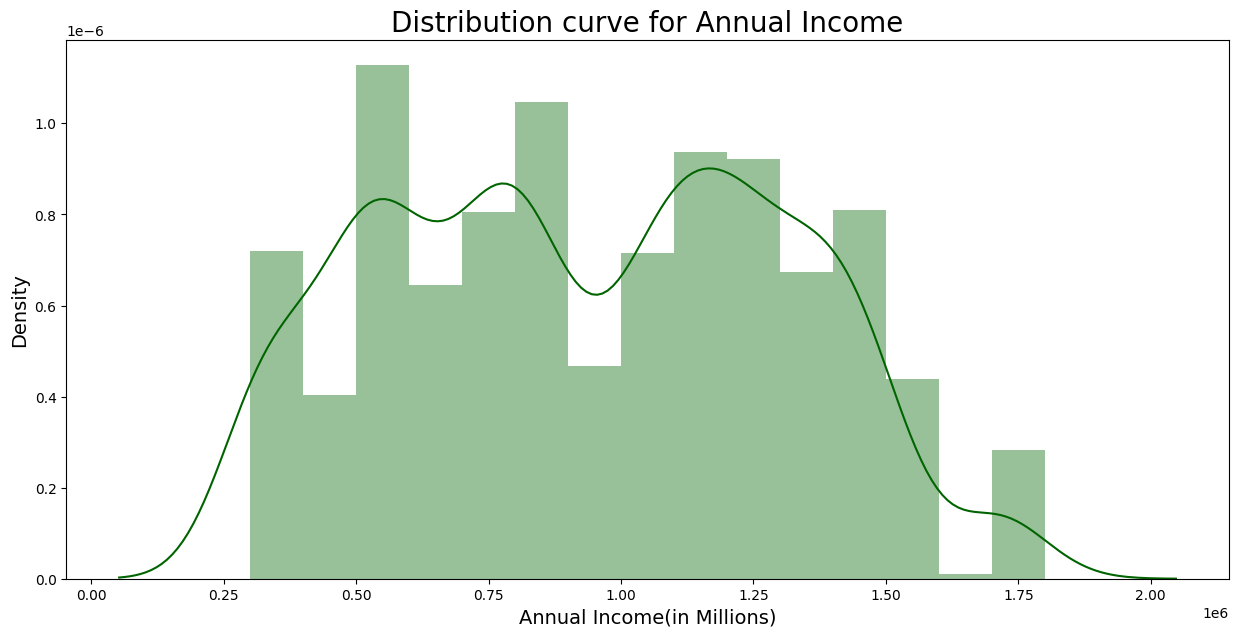

In [28]:
plt.figure(figsize=(15,7))
sns.distplot(df['AnnualIncome'], color = "darkgreen")
print("The mean income is ",round(df['AnnualIncome'].mean(),2))
print("The median income is ",df['AnnualIncome'].median())
plt.title('Distribution curve for Annual Income')
plt.xlabel("Annual Income(in Millions)", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Annual Income', size=20)

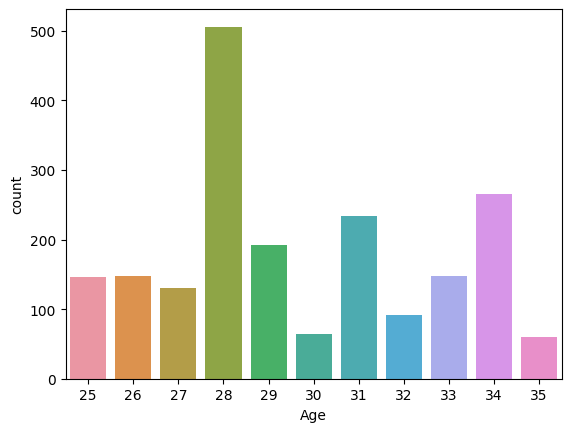

In [29]:
sns.countplot(x = df['Age'])
None

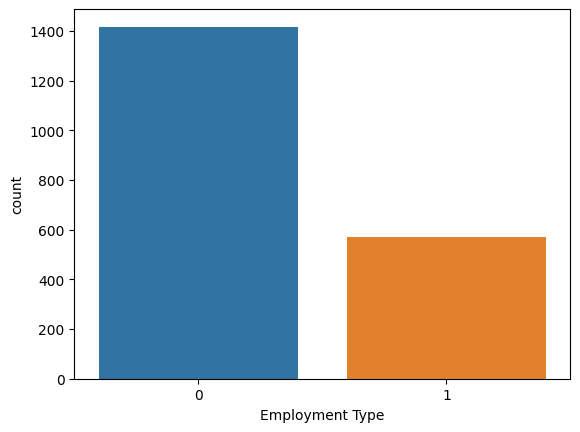

In [30]:
sns.countplot(x = df['Employment Type'])
None

<Axes: xlabel='TravelInsurance', ylabel='count'>

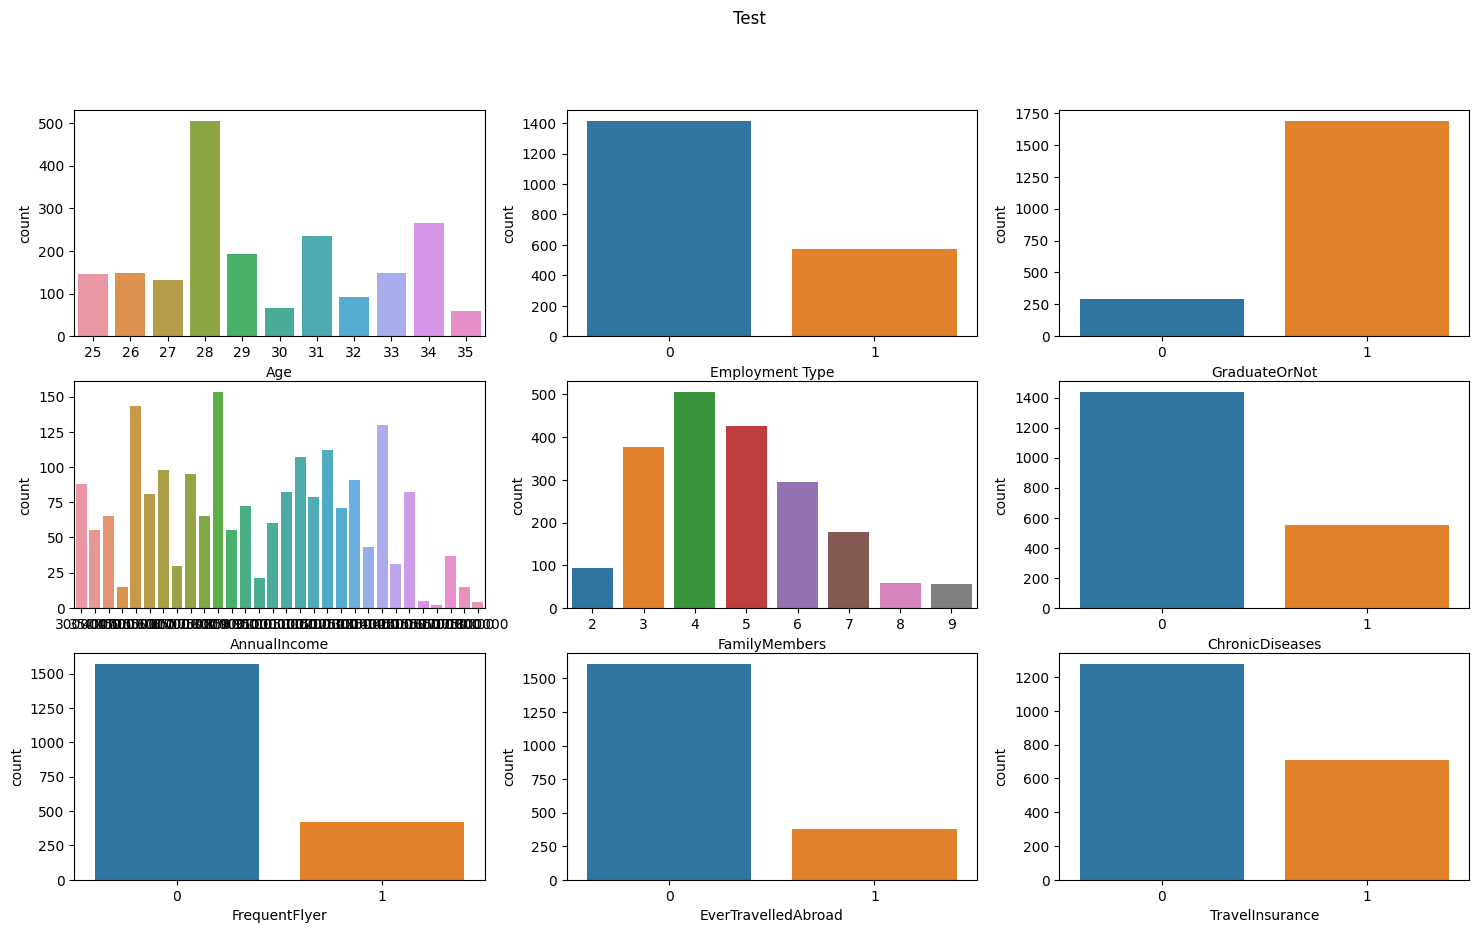

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

fig.suptitle('Test')

sns.countplot(ax=axes[0, 0], x = df['Age'])
sns.countplot(ax=axes[0, 1], x = df['Employment Type'])
sns.countplot(ax=axes[0, 2], x = df['GraduateOrNot'])
sns.countplot(ax=axes[1, 0], x = df['AnnualIncome'])
sns.countplot(ax=axes[1, 1], x = df['FamilyMembers'])
sns.countplot(ax=axes[1, 2], x = df['ChronicDiseases'])
sns.countplot(ax=axes[2, 0], x = df['FrequentFlyer'])
sns.countplot(ax=axes[2, 1], x = df['EverTravelledAbroad'])
sns.countplot(ax=axes[2, 2], x = df['TravelInsurance'])


In [33]:
# converting to CSV file

df.to_csv('Analysis_dataset.csv', index=False)